In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

# Load datasets
client_df = pd.read_csv(r"C:\Users\HP\Desktop\client_data (1).csv")
price_df = pd.read_csv(r"C:\Users\HP\Desktop\price_data (1).csv")

client_df.head(), price_df.head()


(                                 id                     channel_sales  \
 0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
 1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
 2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
 3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
 4  149d57cf92fc41cf94415803a877cb4b                           MISSING   
 
    cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
 0         0         54946                0  2013-06-15  2016-06-15   
 1      4660             0                0  2009-08-21  2016-08-30   
 2       544             0                0  2010-04-16  2016-04-16   
 3      1584             0                0  2010-03-30  2016-03-30   
 4      4425             0              526  2010-01-13  2016-03-07   
 
   date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
 0      2015-11-01   2015-06-23               0.00  

In [2]:
print("Client data shape:", client_df.shape)
print("Price data shape:", price_df.shape)

print("\n--- Client Data Info ---")
print(client_df.info())

print("\n--- Price Data Info ---")
print(price_df.info())


Client data shape: (14606, 26)
Price data shape: (193002, 8)

--- Client Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  foreca

In [3]:
date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

for col in date_cols:
    client_df[col] = pd.to_datetime(client_df[col], errors="coerce")

client_df[date_cols].head()


,date_activ,date_end,date_modif_prod,date_renewal
0,2013-06-15,2016-06-15,2015-11-01,2015-06-23
1,2009-08-21,2016-08-30,2009-08-21,2015-08-31
2,2010-04-16,2016-04-16,2010-04-16,2015-04-17
3,2010-03-30,2016-03-30,2010-03-30,2015-03-31
4,2010-01-13,2016-03-07,2010-01-13,2015-03-09


In [4]:
client_df.describe()


,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175


In [5]:
client_df.isnull().sum().sort_values(ascending=False)


id                                0
channel_sales                     0
pow_max                           0
origin_up                         0
num_years_antig                   0
net_margin                        0
nb_prod_act                       0
margin_net_pow_ele                0
margin_gross_pow_ele              0
imp_cons                          0
has_gas                           0
forecast_price_pow_off_peak       0
forecast_price_energy_peak        0
forecast_price_energy_off_peak    0
forecast_meter_rent_12m           0
forecast_discount_energy          0
forecast_cons_year                0
forecast_cons_12m                 0
date_renewal                      0
date_modif_prod                   0
date_end                          0
date_activ                        0
cons_last_month                   0
cons_gas_12m                      0
cons_12m                          0
churn                             0
dtype: int64

In [6]:
price_df.isnull().sum().sort_values(ascending=False)


id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

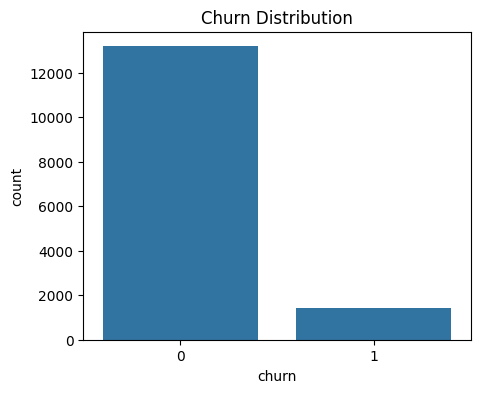

churn
0    90.284814
1     9.715186
Name: proportion, dtype: float64

In [7]:
plt.figure(figsize=(5,4))
sns.countplot(x='churn', data=client_df)
plt.title("Churn Distribution")
plt.show()

client_df['churn'].value_counts(normalize=True)*100


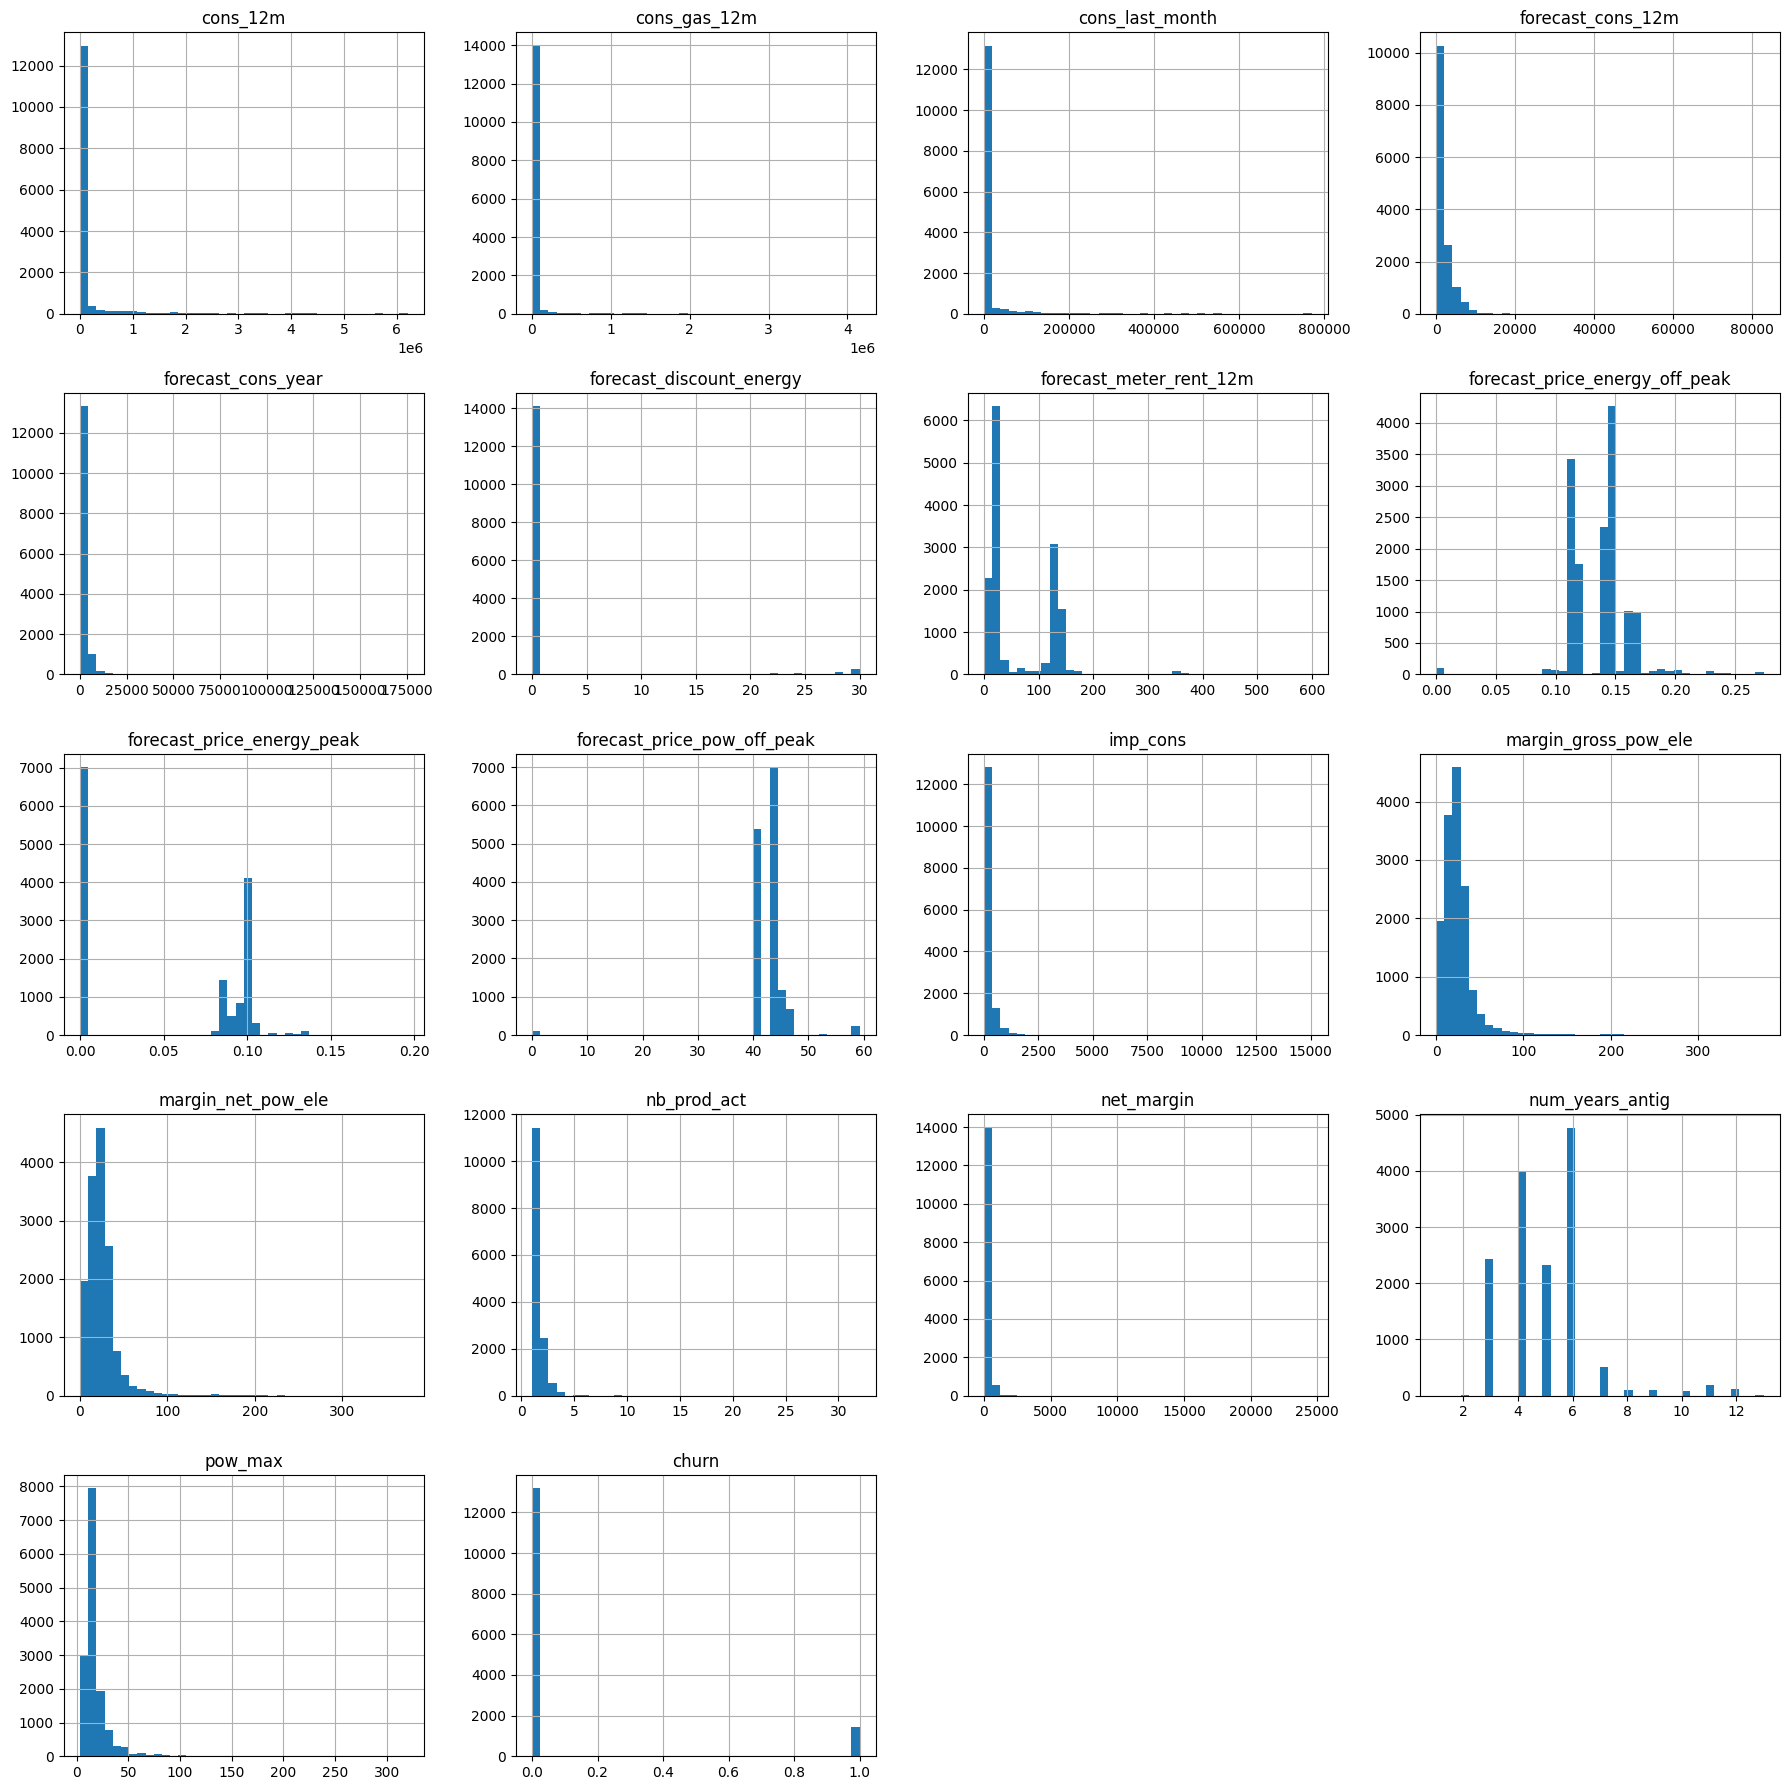

In [8]:
numeric_cols = client_df.select_dtypes(include=[np.number]).columns

client_df[numeric_cols].hist(figsize=(18, 18), bins=40)
plt.tight_layout()
plt.show()


In [9]:
categorical_cols = client_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nValue counts for: {col}")
    print(client_df[col].value_counts().head())



Value counts for: id
id
24011ae4ebbe3035111d65fa7c15bc57    1
2fae70276cd7a4874a2aefcd68d5a184    1
a7a9dac0ffc2ad56c66a1b08d53d0e51    1
6cfbce2099a4163ea4fe422fb28829ea    1
4289e929ecd35a0754e697feb24a091b    1
Name: count, dtype: int64

Value counts for: channel_sales
channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
Name: count, dtype: int64

Value counts for: has_gas
has_gas
f    11955
t     2651
Name: count, dtype: int64

Value counts for: origin_up
origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
Name: count, dtype: int64


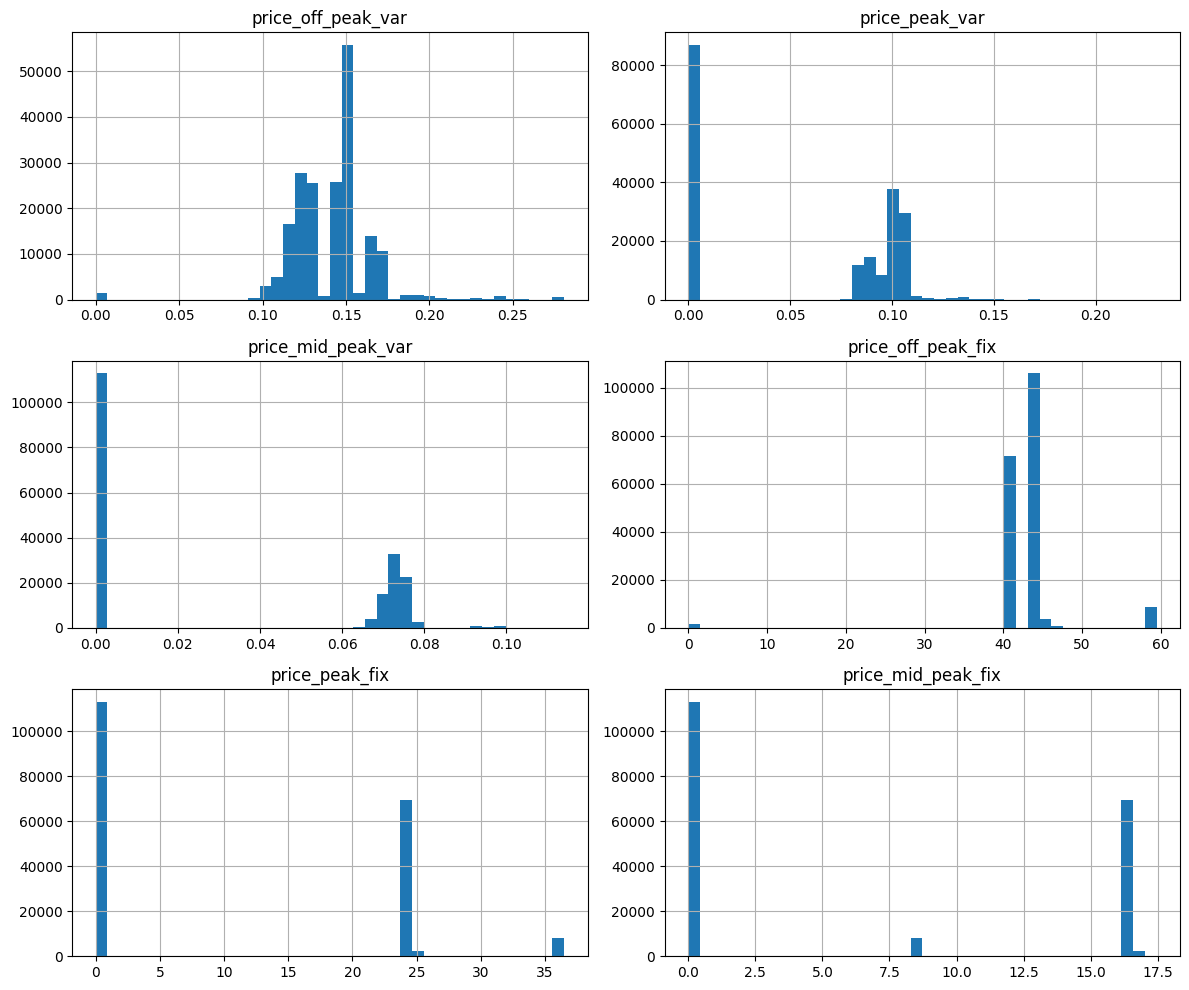

In [10]:
price_numeric = price_df.select_dtypes(include=[np.number]).columns

price_df[price_numeric].hist(figsize=(12,10), bins=40)
plt.tight_layout()
plt.show()


In [11]:
overlap = len(set(client_df['id']).intersection(set(price_df['id'])))
print("IDs present in both datasets:", overlap)


IDs present in both datasets: 14606


In [12]:
# Cell 9 - categorical distributions (top 10)
cat_cols = client_df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    vc = client_df[col].value_counts().head(15)
    plt.figure(figsize=(8,4))
    sns.barplot(x=vc.values, y=vc.index)
    plt.title(f"Top values for {col}")
    plt.tight_layout()
    fname = f"figures/top_{col}.png".replace("/","_")
    plt.savefig(fname)
    plt.close()

print("Saved top-value barplots for categorical columns.")


Saved top-value barplots for categorical columns.


In [14]:
# Cell 11 - ID overlap & sample merge
if 'id' in client_df.columns and 'id' in price_df.columns:
    overlap_ids = set(client_df['id']).intersection(set(price_df['id']))
    print("Unique client IDs:", client_df['id'].nunique())
    print("Unique price IDs :", price_df['id'].nunique())
    print("Overlap count      :", len(overlap_ids))

    # Save counts
    with open("summaries/id_overlap.txt", "w") as f:
        f.write(f"client_unique_ids: {client_df['id'].nunique()}\n")
        f.write(f"price_unique_ids : {price_df['id'].nunique()}\n")
        f.write(f"overlap_count     : {len(overlap_ids)}\n")

    # Example merge: latest price per id (most recent price_date)
    if 'price_date' in price_df.columns:
        latest_price = price_df.sort_values('price_date').groupby('id').tail(1)
        merged = client_df.merge(latest_price, on='id', how='left', suffixes=('','_price'))
        merged.head().to_csv("summaries/merged_sample_head.csv", index=False)
        print("Saved merged sample head.")
else:
    print("No 'id' column in one of the datasets; skipping overlap/merge.")


Unique client IDs: 14606
Unique price IDs : 16096
Overlap count      : 14606


FileNotFoundError: [Errno 2] No such file or directory: 'summaries/id_overlap.txt'